In [3]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import dask.dataframe as dd
import numpy as np
import tensorflow as tf


## EDA

In [5]:

# Load the TSV file into a DataFrame
file_path = "GSE139495_Single_cell_metaData_10252019.tsv"  # Update with the correct path if needed
df = pd.read_csv(file_path, sep="\t")

# Display the first few rows
df.head(50)


,cells,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,alra_snn_res.0.5,seurat_clusters,samples
0,ACAGCTAAGGGTTCCC,Unfiltered_control,7,4,0.000000,9,9,Unfiltered_control
1,ACATACGTCATTTGGG,Unfiltered_control,7,7,0.036010,9,9,Unfiltered_control
2,ACATCAGAGTCGTACT,Unfiltered_control,11,6,0.000000,9,9,Unfiltered_control
3,AGAGTGGGTGCAACTT,Unfiltered_control,7,4,0.150754,9,9,Unfiltered_control
4,AGGCCACGTTCGCGAC,Unfiltered_control,9,2,0.000000,9,9,Unfiltered_control
5,AGTGGGACATCCGGGT,Unfiltered_control,9,4,0.000000,9,9,Unfiltered_control
6,ATCACGAGTCCAGTTA,Unfiltered_control,8,8,0.000000,9,9,Unfiltered_control
7,ATCATGGGTCCGACGT,3,9,8,0.000000,9,9,Filtered_samples
8,ATTACTCCAGATCTGT,Unfiltered_control,12,5,0.000000,9,9,Unfiltered_control
9,CAAGATCGTCCATCCT,3,13,5,0.000000,9,9,Filtered_samples


In [6]:
#return the number of rows in a DataFrame df
len(df)

12330

In [7]:
# Drops all rows with NaN values
df_cleaned = df.dropna()  # Drops all rows with NaN values
len(df_cleaned)


12330

# Quality control pass
* nCount_RNA should be 500-20000,
* nFeature_RNA should be 200-3000
* percent.mt should be less than 10%

In [9]:
# Filter the DataFrame with Quality control measurements to include rows where 'nCount_RNA' is between 500 and 20000
metadata_filtered_nCount = df_cleaned[(df_cleaned['nCount_RNA'] > 500) & (df_cleaned['nCount_RNA'] < 20000)]

# Display summary information about the filtered DataFrame
metadata_filtered_nCount.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12097 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             12097 non-null  object 
 1   orig.ident        12097 non-null  object 
 2   nCount_RNA        12097 non-null  int64  
 3   nFeature_RNA      12097 non-null  int64  
 4   percent.mt        12097 non-null  float64
 5   alra_snn_res.0.5  12097 non-null  int64  
 6   seurat_clusters   12097 non-null  int64  
 7   samples           12097 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 850.6+ KB


In [10]:
# Filter the DataFrame 'metadata_filtered_nCount' to include only rows where 'nFeature_RNA' is between 200 and 3000
metadata_filtered_nFeature = metadata_filtered_nCount[(metadata_filtered_nCount['nFeature_RNA']>200) & (metadata_filtered_nCount['nFeature_RNA']<3000)]

# Display summary information about the filtered DataFrame
metadata_filtered_nFeature.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11998 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             11998 non-null  object 
 1   orig.ident        11998 non-null  object 
 2   nCount_RNA        11998 non-null  int64  
 3   nFeature_RNA      11998 non-null  int64  
 4   percent.mt        11998 non-null  float64
 5   alra_snn_res.0.5  11998 non-null  int64  
 6   seurat_clusters   11998 non-null  int64  
 7   samples           11998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 843.6+ KB


In [11]:
# Filter the DataFrame to include only rows where 'percent.mt' is less than 10, indicating good mitochondrial DNA quality
metadata_filtered_percentMT = metadata_filtered_nFeature[(metadata_filtered_nFeature['percent.mt'] < 10)]

# Display summary information about the filtered DataFrame
metadata_filtered_percentMT.info()
print("In terms of mitochondrial DNA, the quality was very good")


<class 'pandas.core.frame.DataFrame'>
Index: 11998 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             11998 non-null  object 
 1   orig.ident        11998 non-null  object 
 2   nCount_RNA        11998 non-null  int64  
 3   nFeature_RNA      11998 non-null  int64  
 4   percent.mt        11998 non-null  float64
 5   alra_snn_res.0.5  11998 non-null  int64  
 6   seurat_clusters   11998 non-null  int64  
 7   samples           11998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 843.6+ KB
In terms of mitochondrial DNA, the quality was very good


## Identify the data

In [13]:
# Convert the filtered DataFrame back to a regular DataFrame
df1 = metadata_filtered_percentMT.copy()


In [14]:
# Get the column labels of the DataFrame
df1.columns


Index(['cells', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'alra_snn_res.0.5', 'seurat_clusters', 'samples'],
      dtype='object')

In [15]:
# Display summary information about the DataFrame
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11998 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             11998 non-null  object 
 1   orig.ident        11998 non-null  object 
 2   nCount_RNA        11998 non-null  int64  
 3   nFeature_RNA      11998 non-null  int64  
 4   percent.mt        11998 non-null  float64
 5   alra_snn_res.0.5  11998 non-null  int64  
 6   seurat_clusters   11998 non-null  int64  
 7   samples           11998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 843.6+ KB


In [16]:
# Get the data types of each column
df1.dtypes


cells                object
orig.ident           object
nCount_RNA            int64
nFeature_RNA          int64
percent.mt          float64
alra_snn_res.0.5      int64
seurat_clusters       int64
samples              object
dtype: object

In [17]:
# Function to count unique values in each column
def group_common_values(df1):
    for col in df.columns:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())  # Count occurrences of unique values

# Apply the function
group_common_values(df1)


Column: cells
cells
ACAGCTAAGGGTTCCC    1
TTTCCTCTCCACGTGG    1
TTGGCAATCTCCTATA    1
TTGGCAATCTTACCTA    1
TTGGCAATCTTCCTTC    1
                   ..
CTGAAACAGAGGACGG    1
CTGAAACAGATGTTAG    1
CTGAAACAGCCACTAT    1
CTGAAACCAAACAACA    1
TTTACTGCATCCCACT    1
Name: count, Length: 12330, dtype: int64

Column: orig.ident
orig.ident
Unfiltered_control    8457
11                    1641
8,9,10                1124
3                      754
1                      296
2                       29
5                       17
4                        7
6                        3
7                        1
Failed_capture           1
Name: count, dtype: int64

Column: nCount_RNA
nCount_RNA
5        18
9        17
7        14
8        13
12       12
         ..
3946      1
10575     1
6089      1
4320      1
6         1
Name: count, Length: 5799, dtype: int64

Column: nFeature_RNA
nFeature_RNA
1119    22
1123    21
1153    20
1131    20
1130    20
        ..
2500     1
2579     1
2168     1
2185 

In [18]:
# # Import LabelEncoder from scikit-learn to convert categorical labels to numeric values
# from sklearn.preprocessing import LabelEncoder

# # Create an instance of LabelEncoder
# le = LabelEncoder()

# # Apply the label encoder to the 'cells' column and transform categorical values into numeric labels
# #df['cells'] = le.fit_transform(df['cells'])

# # Uncomment the following line to transform the 'orig.ident' column in the same way
# # df['orig.ident'] = le.fit_transform(df['orig.ident'])


# Reset the values

In [20]:
# Rename columns in the DataFrame: 'orig.ident' to 'patient' and 'percent.mt' to 'percent'
df_renamed = df1.rename(columns = {'orig.ident': 'patient', 'percent.mt': 'percent'})

# Display the first 20 rows of the renamed DataFrame
df_renamed.head()


,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,AAACCTGAGCATCATC,Unfiltered_control,2322,834,3.875969,5,5,Unfiltered_control
41,AAACCTGAGCTAACTC,Unfiltered_control,1652,785,5.871671,1,1,Unfiltered_control
42,AAACCTGAGCTAGTGG,Unfiltered_control,4357,1261,1.973835,2,2,Unfiltered_control
43,AAACCTGCACATTAGC,Unfiltered_control,2681,852,1.454681,0,0,Unfiltered_control
44,AAACCTGCACTGTTAG,Unfiltered_control,4514,1475,3.655295,1,1,Unfiltered_control


In [21]:

# Count common values in 'cells' and 'patient'
cell_counts = df_renamed["cells"].value_counts()
orig_ident_counts = df_renamed["patient"].value_counts()

# Display results
print("Common values in 'cells':")
print(cell_counts)

print("\nCommon values in 'orig.ident':")
print(orig_ident_counts)


Common values in 'cells':
cells
AAACCTGAGCATCATC    1
TTGACTTGTCGATTGT    1
TTGACTTAGGTGCACA    1
TTGACTTAGTCAAGGC    1
TTGACTTCACGGCTAC    1
                   ..
CTCTACGGTGGTAACG    1
CTCTACGGTTTAGCTG    1
CTCTACGTCAGGATCT    1
CTCTACGTCCACTCCA    1
TTTGTCATCGAGAACG    1
Name: count, Length: 11998, dtype: int64

Common values in 'orig.ident':
patient
Unfiltered_control    8246
11                    1607
8,9,10                1101
3                      736
1                      277
2                       24
5                        4
4                        1
6                        1
7                        1
Name: count, dtype: int64


---------------------------

# Patient data description
* non metastasis = 0
* metastasis = 1

In [24]:
# look through patient column 
df_renamed['patient'].unique()


array(['Unfiltered_control', '1', '4', '6', '7', '5', '8,9,10', '2', '11',
       '3'], dtype=object)

In [25]:
# Replace the value 'Unfiltered_control' in the 'patient' column with '0'
df_renamed['patient'] = df_renamed['patient'].replace({'Unfiltered_control': '0'})


In [26]:
# Get the unique values in the 'patient' column after renamed
df_renamed['patient'].unique()


array(['0', '1', '4', '6', '7', '5', '8,9,10', '2', '11', '3'],
      dtype=object)

In [27]:
# Replace values different than '0' with '1'
df_renamed['patient'] = df_renamed['patient'].apply(lambda x: '1' if x != '0' else '0')

# Drop rows where the 'patient' column has the value 'Failed_capture'
df_renamed = df_renamed[df_renamed['patient'] != 'Failed_capture']

# Check the unique values in the 'patient' column
df_renamed['patient'].unique()


array(['0', '1'], dtype=object)

In [28]:
# Get the unique values in the 'samples' column
df_renamed['samples'].unique()


array(['Unfiltered_control', 'Filtered_samples', 'Unfiltered_sample'],
      dtype=object)

In [29]:
# Get the unique values in the 'patient' column
df_renamed['patient'].unique()


array(['0', '1'], dtype=object)

# Sample column description 
* Unfiltered_control = 0
* Filtered_samples = 1
* Unfiltered_sample = 2

In [31]:
# Replace specific values in the 'samples' column with new labels: 
# 'Unfiltered_control' → '0', 'Filtered_samples' → '1', 'Unfiltered_sample' → '2'
df_renamed['samples'] = df_renamed['samples'].replace({'Unfiltered_control': '0', 'Filtered_samples': '1', 'Unfiltered_sample': '2'})

# Display the updated DataFrame
df_renamed


,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,AAACCTGAGCATCATC,0,2322,834,3.875969,5,5,0
41,AAACCTGAGCTAACTC,0,1652,785,5.871671,1,1,0
42,AAACCTGAGCTAGTGG,0,4357,1261,1.973835,2,2,0
43,AAACCTGCACATTAGC,0,2681,852,1.454681,0,0,0
44,AAACCTGCACTGTTAG,0,4514,1475,3.655295,1,1,0
...,...,...,...,...,...,...,...,...
12271,TTTCCTCTCCTGTAGA,1,7297,1872,3.768672,1,1,1
12272,TTTGCGCAGTAGCGGT,1,2263,711,2.430402,0,0,1
12273,TTTGGTTTCAGCCTAA,1,4676,1107,3.485885,2,2,1
12274,TTTGTCATCCACGAAT,1,2878,1015,2.675469,6,6,1


In [32]:
# Get the unique values in the 'percent' column
df_renamed['percent'].unique()


array([3.87596899, 5.8716707 , 1.97383521, ..., 3.48588537, 2.67546908,
       3.85745775])

In [33]:
# Round the values in the 'percent' column to 4 decimal places
df_renamed['percent'] = df_renamed['percent'].round(4)

# Display the first 10 rows of the updated DataFrame
df_renamed.head(10)


,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,AAACCTGAGCATCATC,0,2322,834,3.8760,5,5,0
41,AAACCTGAGCTAACTC,0,1652,785,5.8717,1,1,0
42,AAACCTGAGCTAGTGG,0,4357,1261,1.9738,2,2,0
43,AAACCTGCACATTAGC,0,2681,852,1.4547,0,0,0
44,AAACCTGCACTGTTAG,0,4514,1475,3.6553,1,1,0
45,AAACCTGCATAGTAAG,0,4259,1443,3.8741,1,1,0
46,AAACCTGCATGAACCT,0,3087,1209,3.8225,4,4,0
47,AAACCTGGTAAGAGGA,0,5036,1389,3.1176,2,2,0
48,AAACCTGGTAGAAGGA,0,5277,1582,4.1311,1,1,0
49,AAACCTGGTCCAGTGC,0,4276,1086,3.2039,0,0,0


In [34]:
# Convert the 'patient' column to int32
df_renamed['patient'] = df_renamed['patient'].astype('int32')
df_renamed['samples'] = df_renamed['samples'].astype('int32')

# Verify the change in data types
print(df_renamed.dtypes)


cells                object
patient               int32
nCount_RNA            int64
nFeature_RNA          int64
percent             float64
alra_snn_res.0.5      int64
seurat_clusters       int64
samples               int32
dtype: object


--------------------------------------

# Convert datatypes to ease memory processing 

In [37]:
# Convert the 'patient' column to category type, then to numeric codes
df_renamed['patient'] = df_renamed['patient'].astype('category').cat.codes

# Now check the data type
print(df_renamed['patient'].dtype)  # Should be int32
df_renamed.head(10)


int8


,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,AAACCTGAGCATCATC,0,2322,834,3.8760,5,5,0
41,AAACCTGAGCTAACTC,0,1652,785,5.8717,1,1,0
42,AAACCTGAGCTAGTGG,0,4357,1261,1.9738,2,2,0
43,AAACCTGCACATTAGC,0,2681,852,1.4547,0,0,0
44,AAACCTGCACTGTTAG,0,4514,1475,3.6553,1,1,0
45,AAACCTGCATAGTAAG,0,4259,1443,3.8741,1,1,0
46,AAACCTGCATGAACCT,0,3087,1209,3.8225,4,4,0
47,AAACCTGGTAAGAGGA,0,5036,1389,3.1176,2,2,0
48,AAACCTGGTAGAAGGA,0,5277,1582,4.1311,1,1,0
49,AAACCTGGTCCAGTGC,0,4276,1086,3.2039,0,0,0


In [38]:
# Display summary information about the DataFrame, including column data types and non-null counts
df_renamed.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11998 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             11998 non-null  object 
 1   patient           11998 non-null  int8   
 2   nCount_RNA        11998 non-null  int64  
 3   nFeature_RNA      11998 non-null  int64  
 4   percent           11998 non-null  float64
 5   alra_snn_res.0.5  11998 non-null  int64  
 6   seurat_clusters   11998 non-null  int64  
 7   samples           11998 non-null  int32  
dtypes: float64(1), int32(1), int64(4), int8(1), object(1)
memory usage: 714.7+ KB


In [39]:
# Get the number of rows in the DataFrame
len(df_renamed)


11998

In [40]:
# Get the count of each unique value in the 'patient' column
df_renamed["patient"].value_counts()


patient
0    8246
1    3752
Name: count, dtype: int64

In [41]:
# Get summary statistics for the DataFrame 'df_filtered'
df_renamed.describe()


,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
count,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000,11998.000000
mean,0.312719,3680.591849,1141.899983,2.804419,3.010252,3.010252,0.446658
std,0.463620,2049.630149,486.113280,1.196821,3.213341,3.213341,0.717688
min,0.000000,501.000000,204.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2310.000000,776.000000,1.954700,0.000000,0.000000,0.000000
50%,0.000000,3407.000000,1120.500000,2.576550,2.000000,2.000000,0.000000
75%,1.000000,4505.500000,1390.000000,3.439700,5.000000,5.000000,1.000000
max,1.000000,18492.000000,2995.000000,7.496500,14.000000,14.000000,2.000000


In [42]:
# # Drop rows where the target 'cells' column has only one value
# df_filtered2 = df_filtered[df_filtered['cells'].isin(pd.Series(y).value_counts()[pd.Series(y).value_counts() > 1].index)]


In [43]:
# Print the number of rows and columns in the DataFrame after filtering
print(df_renamed.shape)  # Check number of rows and columns after filtering


(11998, 8)


# Save the df_renamed into csv file 

In [45]:
# Save the DataFrame to a CSV file
df_renamed.to_csv('1.0df_renamed.csv', index=False)


# Covert 'cells' column into binary 

In [47]:
# Import LabelEncoder from scikit-learn to convert categorical labels to numeric values
from sklearn.preprocessing import LabelEncoder
df_renamed_1 = df_renamed
# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply the label encoder to the 'cells' column and transform categorical values into numeric labels
df_renamed_1['cells'] = le.fit_transform(df_renamed_1['cells'])

# Display the entire DataFrame 'df_renamed'
df_renamed_1



,cells,patient,nCount_RNA,nFeature_RNA,percent,alra_snn_res.0.5,seurat_clusters,samples
40,1,0,2322,834,3.8760,5,5,0
41,4,0,1652,785,5.8717,1,1,0
42,6,0,4357,1261,1.9738,2,2,0
43,11,0,2681,852,1.4547,0,0,0
44,12,0,4514,1475,3.6553,1,1,0
...,...,...,...,...,...,...,...,...
12271,11912,1,7297,1872,3.7687,1,1,1
12272,11923,1,2263,711,2.4304,0,0,1
12273,11962,1,4676,1107,3.4859,2,2,1
12274,11992,1,2878,1015,2.6755,6,6,1


# Split the data 

In [49]:
# Redefine X and y after filtering: 'y' contains the target variable ('patient'), 'X' contains the feature data
y = df_renamed_1['patient']  # Extract the 'patient' column as the target variable
X = df_renamed_1.drop(columns='patient').values  # Drop the 'patient' column to get the features


In [50]:
# Display summary information about the DataFrame 'df_renamed_1', including column data types and non-null counts
df_renamed_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11998 entries, 40 to 12275
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cells             11998 non-null  int32  
 1   patient           11998 non-null  int8   
 2   nCount_RNA        11998 non-null  int64  
 3   nFeature_RNA      11998 non-null  int64  
 4   percent           11998 non-null  float64
 5   alra_snn_res.0.5  11998 non-null  int64  
 6   seurat_clusters   11998 non-null  int64  
 7   samples           11998 non-null  int32  
dtypes: float64(1), int32(2), int64(4), int8(1)
memory usage: 667.9 KB


In [51]:
# Check size of the DataFrame before filtering
print(f"Original dataset size: {df_renamed_1.shape}")

# Filter the DataFrame to remove classes with a single sample
class_counts = pd.Series(y).value_counts()  # Get the count of samples for each class
filtered_classes = class_counts[class_counts > 1].index  # Get classes with more than one sample
df_filtered = df_renamed_1[df_renamed_1['cells'].isin(filtered_classes)]  # Filter out classes with a single sample

# Check size of the DataFrame after filtering
print(f"Filtered dataset size: {df_filtered.shape}")


Original dataset size: (11998, 8)
Filtered dataset size: (2, 8)


In [52]:
# Print the count of each class in the 'y' variable to see class distribution
print(y.value_counts())


patient
0    8246
1    3752
Name: count, dtype: int64


In [53]:
# Check class distribution of 'patient'
class_counts = pd.Series(y).value_counts()
print(class_counts)


patient
0    8246
1    3752
Name: count, dtype: int64


In [54]:
# Split the data: 'y' contains the target variable ('patient'), 'X' contains the feature data
y = df_renamed['patient'].values  # Extract the 'patient' column as the target variable
X = df_renamed.drop(columns='patient').values  # Drop the 'patient' column to get the features

# Split the data into training and testing sets, maintaining class distribution (stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [55]:
#Scale data 
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
print(f"Unique labels in y_train: {set(y_train)}")
print(f"Unique labels in y_test: {set(y_test)}")


Unique labels in y_train: {0, 1}
Unique labels in y_test: {0, 1}


In [57]:
print(f"                        Number of Total Records: {len(df_renamed)}")
print(f"After Data split Number if Records in Train set: {len(X_train_scaled)}")
print(f"After Data split Number if Records in Test  set: {len(X_test_scaled)}")


                        Number of Total Records: 11998
After Data split Number if Records in Train set: 8998
After Data split Number if Records in Test  set: 3000


## Model creation

In [59]:
# Define the deep learning model 
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),  # First hidden layer with 128 units and ReLU activation
    tf.keras.layers.Dense(2)  # Output layer with 2 units (for binary classification or 2-class classification)
])

# Compile the Sequential model together and customize metrics
#nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
nn_model.compile(optimizer='adam',  # Adam optimizer for model training
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Use sparse categorical crossentropy loss function for multi-class classification
              metrics=['accuracy'])  # Track accuracy during training

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)  # Fit the model to training data for 50 epochs

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)  # Evaluate the model on test data and return loss and accuracy
print(f"\n\nLoss: {model_loss}, Accuracy: {model_accuracy}")  # Print the model's loss and accuracy on the test data


Epoch 1/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8672 - loss: 0.3457 - val_accuracy: 0.9978 - val_loss: 0.0274
Epoch 2/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9992 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 3/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 4/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.9031e-04 - val_accuracy: 1.0000 - val_loss: 6.8556e-04
Epoch 6/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.0479e-04 - val_accuracy: 1.0000 - val_loss: 4.6157e-04
Epoch 7/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.1584e-04 - val_accuracy: 1.0000 - val_loss: 3.2787e-04
Epoch 8/50
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2

In [60]:
# Display the model architecture summary
nn_model.summary()  # Prints a summary of the model architecture, showing the layers, output shapes, and number of parameters


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,848 (15.04 KB)

 Trainable params: 1,282 (5.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,566 (10.03 KB)

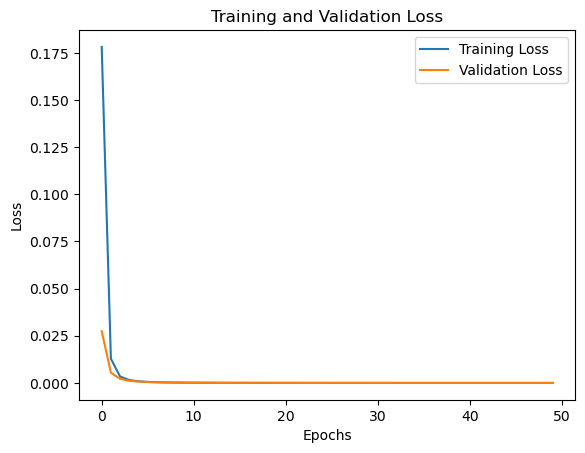

In [61]:
import matplotlib.pyplot as plt  # Import matplotlib for plotting the training process

history_df = pd.DataFrame(fit_model.history)  # Convert the training history to a pandas DataFrame

# Increase the index by 1 to match the number of epochs
history_df.index += 1  # Adjust index to start from epoch 1 for easier visualization

# Plot the training loss over epochs
plt.plot(fit_model.history['loss'], label='Training Loss')

# Only plot validation loss if it exists in the history dictionary
if 'val_loss' in fit_model.history:
    plt.plot(fit_model.history['val_loss'], label='Validation Loss')

# Label the x-axis as "Epochs" to indicate the number of training iterations
plt.xlabel('Epochs')

# Label the y-axis as "Loss" to represent the model's loss values
plt.ylabel('Loss')

# Set a title for the plot to describe its purpose
plt.title('Training and Validation Loss')

# Display the legend to differentiate between training and validation loss curves
plt.legend()

# Show the plot
plt.show()


In [62]:
# Display the first 25 rows of the training history DataFrame to inspect loss and accuracy trends  
history_df.head(10)


,accuracy,loss,val_accuracy,val_loss
1,0.954849,0.178187,0.997778,0.027411
2,0.999583,0.012833,1.000000,0.005392
3,1.000000,0.003376,1.000000,0.002130
4,1.000000,0.001519,1.000000,0.001120
5,1.000000,0.000860,1.000000,0.000686
6,1.000000,0.000550,1.000000,0.000462
7,1.000000,0.000379,1.000000,0.000328
8,1.000000,0.000275,1.000000,0.000244
9,1.000000,0.000207,1.000000,0.000186
10,1.000000,0.000160,1.000000,0.000146


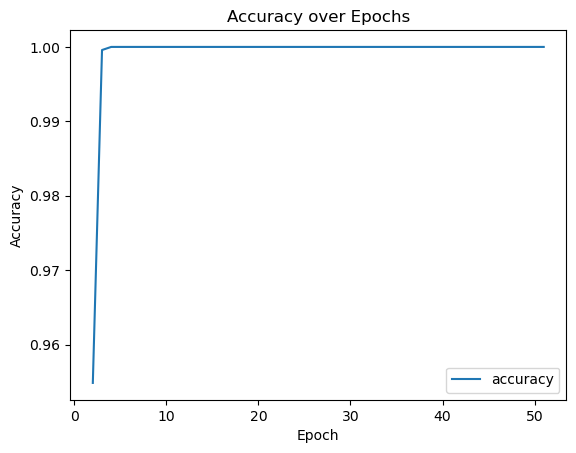

In [63]:
import matplotlib.pyplot as plt  # Import matplotlib for data visualization

# Assuming history_df is a DataFrame containing the training history

# Increase the index by 1 to match the number of epochs (starting from 1 instead of 0)
history_df.index += 1  

# Plot the accuracy over epochs
history_df.plot(y="accuracy")  # Plot the accuracy values from the training history

# Label the x-axis as "Epoch" to indicate the number of training iterations
plt.xlabel("Epoch")

# Label the y-axis as "Accuracy" to represent the model's accuracy values
plt.ylabel("Accuracy")

# Set a title for the plot to describe its purpose
plt.title("Accuracy over Epochs")

# Show the plot
plt.show()


# This defines the function do_inferencing, which takes two parameters:
* model: The trained deep learning model.
* data: The input data on which the model will make predictions.

In [65]:
def do_inferencing(model, data):
    """
    Perform inference using the trained model on the given data.

    Parameters:
    model: The trained deep learning model.
    data: The input data on which predictions will be made.

    Returns:
    predictions: The model's predicted output for the given data.
    """

    # Generate predictions using the model
    predictions = model.predict(data)

    # Return the predictions
    return predictions


In [66]:
# Generate predictions for the test dataset using the trained model
predictions = nn_model.predict(X_test_scaled)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [67]:
# Access the first prediction from the array of predictions
predictions[0]

# predictions[0] retrieves the first prediction in the array, corresponding to the first input sample in X_test_scaled.

array([ 7.5079126, -7.9951954], dtype=float32)

In [68]:
# Print a reference for class labels  
print("non-metastasis = 0, metastasis = 1")  

# Get the index of the highest value in the first prediction, representing the predicted class  
predicted_class = np.argmax(predictions[0])  

# Print the predicted class label  
print("Predicted class patient = 0:", predicted_class)


non-metastasis = 0, metastasis = 1
Predicted class patient = 0: 0


In [142]:
# Define the patient control list
patient_control = ["non-metastasis", "metastasis"]

# Get the actual label from y_test and make sure it's accessible in df_renamed
# Ensure the label is an integer that corresponds to the index correctly
actual_label = df_renamed.loc[df_renamed['patient'] == y_test[6], 'patient'].values[0]

# Get the predicted label using np.argmax for the prediction
predicted_label = patient_control[np.argmax(predictions[6])]

# Print the actual and predicted labels for patient #6
print(f"Patient #7: Actual Label = {actual_label} \t Predicted Label = {predicted_label}")


Patient #7: Actual Label = 1 	 Predicted Label = metastasis


------------------------------------

In [71]:
def do_inferencing(model, data):
    """
    Perform inference (prediction) on the given data using the provided model.
    
    Parameters:
    model (keras.Model): The trained Keras model.
    data (numpy.array or DataFrame): The input data to predict on.

    Returns:
    numpy.array: Predicted labels (or probabilities, depending on the model).
    """
    predictions = model.predict(data)  # Get predictions from the model
    predicted_classes = np.argmax(predictions, axis=1)  # Convert predictions to class labels
    return predicted_classes


In [72]:
# Assuming `nn_model` is your trained model and `X_test_scaled` is your test data
predicted_labels = do_inferencing(nn_model, X_test_scaled)

# Print out predictions for the first few test samples
print(f"Predicted labels for the first few test samples: {predicted_labels[:20]}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted labels for the first few test samples: [0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0]


In [73]:
# Convert the predicted labels to a DataFrame
df_predictions = pd.DataFrame(predicted_labels, columns=['Predicted_Label'])

# If you want to include the original test data in the DataFrame
# Ensure 'X_test_scaled' is a DataFrame; if it's a NumPy array, convert it
if isinstance(X_test_scaled, np.ndarray):
    X_test_scaled = pd.DataFrame(X_test_scaled)

# Concatenate the original test data with the predictions
df_predictions = pd.concat([X_test_scaled, df_predictions], axis=1)

# Display the first few rows of the DataFrame
df_predictions.head(20)

,0,1,2,3,4,5,6,Predicted_Label
0,0.497824,0.559616,0.399048,-0.614671,-0.939671,-0.939671,-0.622285,0
1,-0.129070,-1.474896,-1.798837,-0.508807,1.848153,1.848153,2.170392,1
2,-1.243291,-0.331422,-0.618834,-0.808729,-0.939671,-0.939671,0.774054,1
3,1.026964,0.851299,0.661727,-0.192379,0.918878,0.918878,-0.622285,0
4,0.104502,-0.947735,-1.162662,0.366537,-0.010396,-0.010396,2.170392,1
5,-0.820268,0.601770,0.780753,0.946209,-0.629913,-0.629913,-0.622285,0
6,-0.717612,-0.367761,-0.799426,-0.541400,-0.939671,-0.939671,0.774054,1
7,0.032700,0.875041,0.760231,1.398510,-0.629913,-0.629913,-0.622285,0
8,0.190721,0.311540,0.497552,-1.065972,-0.320155,-0.320155,-0.622285,0
9,0.670263,-0.436563,-0.276120,-0.149867,0.609120,0.609120,-0.622285,0


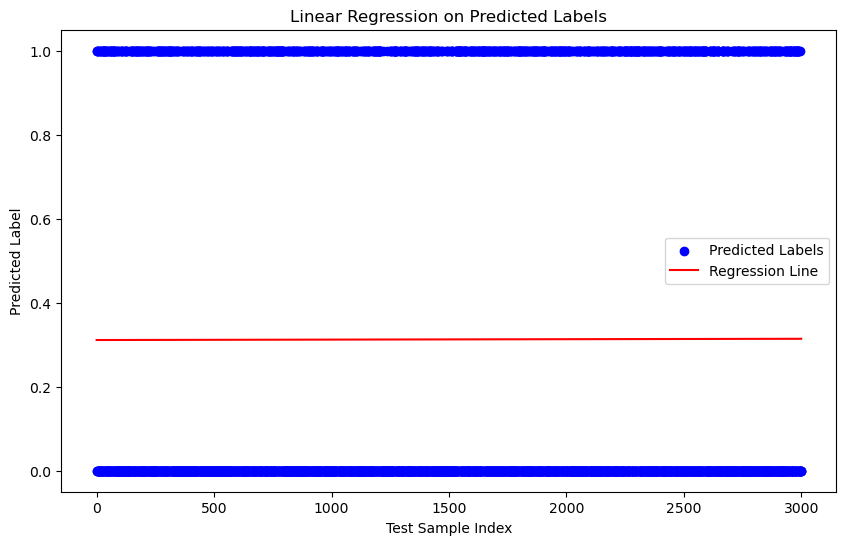

In [74]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming df_predictions has the predicted labels in 'Predicted_Label'

# Reshape the data for linear regression (X needs to be 2D, y is 1D)
X = df_predictions.index.values.reshape(-1, 1)  # Use the index (sample number) as X
y = df_predictions['Predicted_Label'].values  # Use the predicted labels as y

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the values based on the regression model
y_pred = model.predict(X)

# Plot the original data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', label='Predicted Labels')  # Plot the original data points
plt.plot(X, y_pred, color='r', label='Regression Line')  # Plot the regression line

# Customize the plot
plt.xlabel('Test Sample Index')
plt.ylabel('Predicted Label')
plt.title('Linear Regression on Predicted Labels')
plt.legend()

# Show the plot
plt.show()


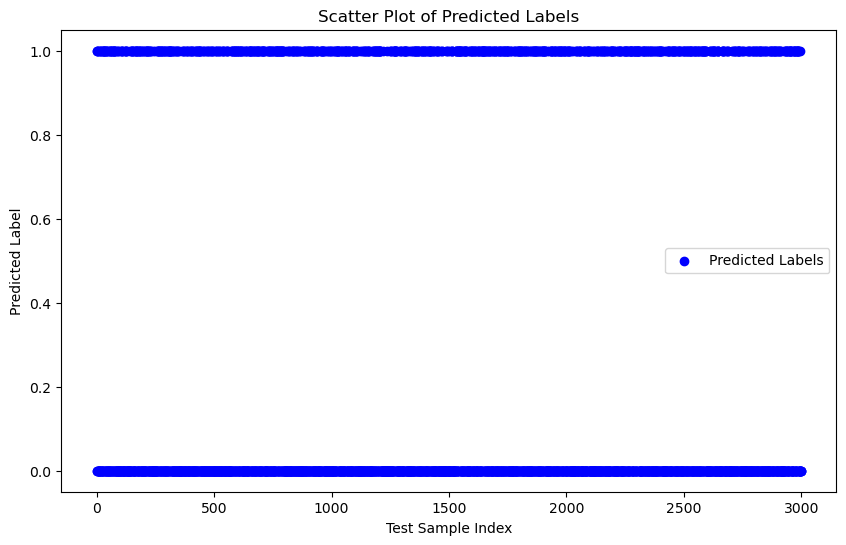

In [75]:
import matplotlib.pyplot as plt

# Assuming df_predictions has the predicted labels in 'Predicted_Label'

# Create a scatter plot of the predicted labels against the sample index
plt.figure(figsize=(10, 6))

# Scatter plot of the predicted labels
plt.scatter(df_predictions.index, df_predictions['Predicted_Label'], color='b', label='Predicted Labels')

# Customize the plot
plt.xlabel('Test Sample Index')  # Label for the x-axis
plt.ylabel('Predicted Label')    # Label for the y-axis
plt.title('Scatter Plot of Predicted Labels')  # Title for the plot
plt.legend()

# Show the plot
plt.show()
